In [1]:
import os
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [30]:
METHOD = "RF_sift"

DATA_FILE = "../data/data.json"
PRED_FILE = f"../data/pred_{METHOD}.json"

FOLDER_IMGS = "../data/pain"

In [31]:
data = pd.read_json(DATA_FILE)
data = data[data.split=="test"]

pred = pd.read_json(PRED_FILE)

In [32]:
id2s = {i: s for i, s in data.groupby(["clase", "clase_str"]).groups}
id2s = [id2s[i] for i in range(len(id2s))]

In [33]:
y_test = np.array(data.clase)
y_pred = np.array(pred.prediccion)

In [34]:
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=id2s))

              precision    recall  f1-score   support

         f10       0.83      1.00      0.91         5
         f11       1.00      1.00      1.00         4
         f12       1.00      0.80      0.89         5
         f13       1.00      1.00      1.00         5
          f1       1.00      1.00      1.00         5
          f2       1.00      1.00      1.00         5
          f3       1.00      1.00      1.00         5
          f4       1.00      0.80      0.89         5
          f5       1.00      1.00      1.00         5
          f6       1.00      1.00      1.00         5
          f7       1.00      1.00      1.00         5
          f8       1.00      1.00      1.00         5
          f9       1.00      1.00      1.00         5
         m10       1.00      1.00      1.00         4
          m1       1.00      1.00      1.00         5
          m2       1.00      1.00      1.00         5
          m3       0.83      1.00      0.91         5
          m4       1.00    

In [35]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy: 98.20%


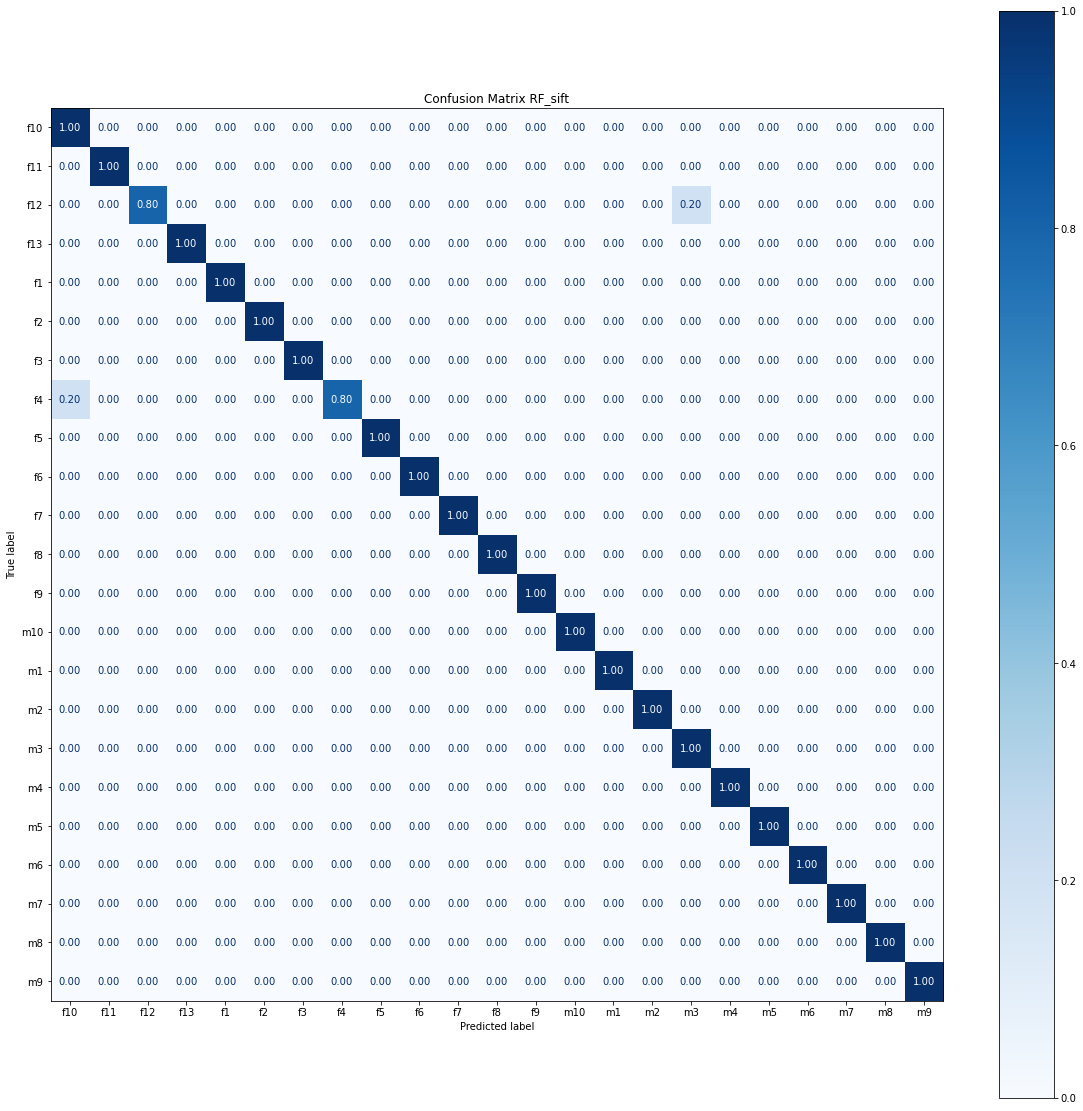

In [36]:
conf_m = confusion_matrix(y_test, y_pred, normalize='true')

fig, ax = plt.subplots(figsize=(20, 20))
ax.set_title(f"Confusion Matrix {METHOD}")
ConfusionMatrixDisplay(conf_m, display_labels=id2s).plot(cmap="Blues", values_format=".2f", ax=ax)
plt.show()

In [37]:
errors = np.where(y_test!=y_pred)
errors_names = data.iloc[errors].nombre
errors_y_test = y_test[errors]
errors_y_pred = y_pred[errors]

f12h1.jpg	Real:f12	Pred:m3


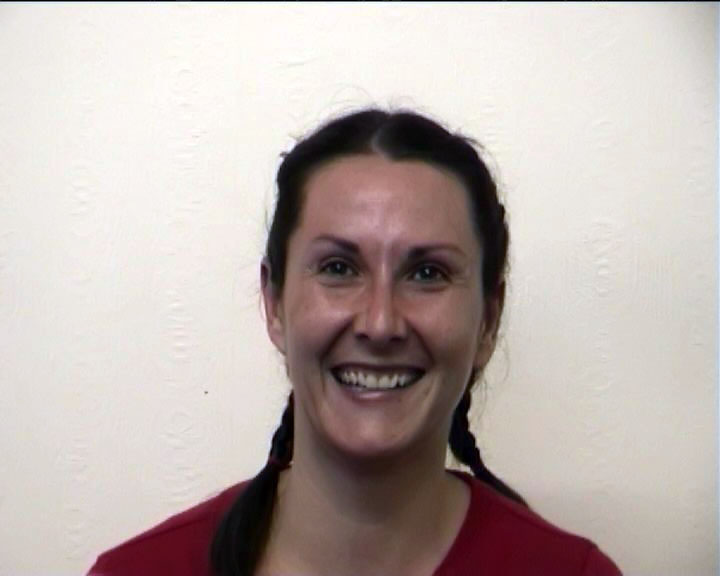

f4p9.jpg	Real:f4	Pred:f10


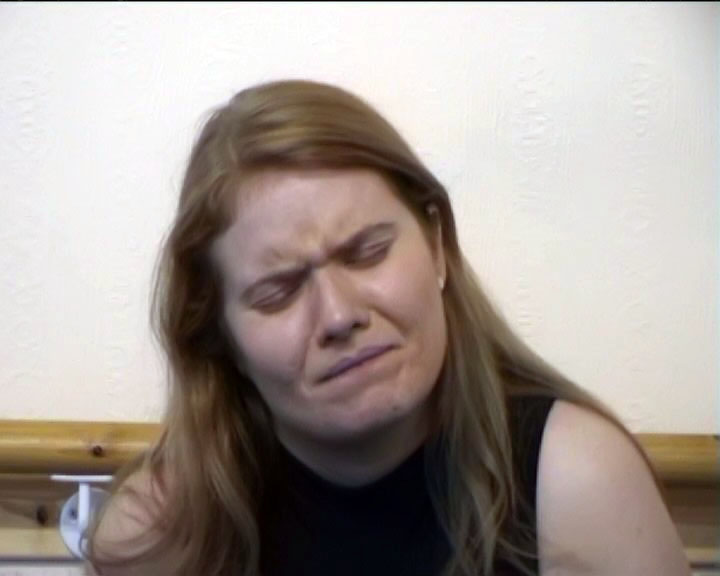

In [38]:
for nombre, real, prediction in zip(errors_names, errors_y_test, errors_y_pred):
    img = Image.open(os.path.join(FOLDER_IMGS, nombre))
    print(f"{nombre}\tReal:{id2s[real]}\tPred:{id2s[prediction]}")
    display(img)